# Multirate integrator for Fermi-Pasta-Ulam-Tsingou problem

Julia implementation of the multirate integration scheme used in the numerical experiments of the chapter
Leyendecker S., Ober-Blöbaum S. (2013)
A Variational Approach to Multirate Integration for Constrained Systems.
In: Samin JC., Fisette P. (eds) Multibody Dynamics. Computational Methods in Applied Sciences, vol 28. Springer, Dordrecht. 
https://doi.org/10.1007/978-94-007-5404-1_5


In [1]:
include("FPU_setup.jl");
include("MultiRateTools.jl");

DiscreteConjugateMomenta (generic function with 1 method)

In [2]:
# Define continuous potentials and Lagrangian
omega = 10 # stiffness
fastPotential, slowPotential, kineticTerm, L, Hamiltonian, OscillatoryEnergy = FPU(omega);

In [3]:
# Define discrete potentials and Lagrangian
Ld = BuildDiscreteL(fastPotential, slowPotential, kineticTerm);

In [4]:
# Initialise multirate integrator
MultiRateIntegrate, _, _ = MultiRateIntegrator(Ld);

In [5]:
microsteps = 10           # variable "p" in Multibody dynamics p.108
h = 0.1                   # length macro step
h_micro = h/microsteps;    # length micro step

In [6]:
# initial values
qs0  = [1.,0,0]
qf00 = [1/omega,0,0]
# initial (discrete) conjugate momenta
ps0  = [1.,0,0]
pf00 = [1.,0,0];

In [7]:
N  = 1000          # number of macro-steps (compute until q_N, init. is at q_0)
QS,QF,checkSolver = MultiRateIntegrate(qs0,qf00,ps0,pf00,N,h,microsteps);

In [8]:
# evaluate internal convergence check for the internal solver NLSolve
if (sum(checkSolver) == N-1)
    print("Convergence check passed")
else 
    print("! Convergence check failed. !")
end

Convergence check passed

In [9]:
T = (0:N)*h # macro timegrid
t = (0:N*microsteps)*h/microsteps # micro timegrid

0.0:0.01:100.0

In [10]:
using Plots

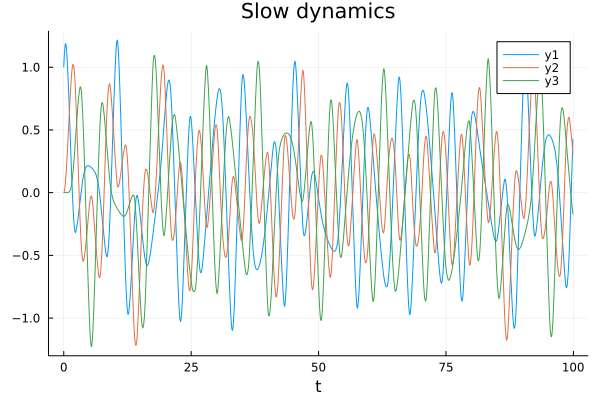

In [11]:
maxInd = N
maxIndMicro = maxInd*microsteps

plot(T[1:maxInd],transpose(QS[:,1:maxInd]))
xlabel!("t")
title!("Slow dynamics")

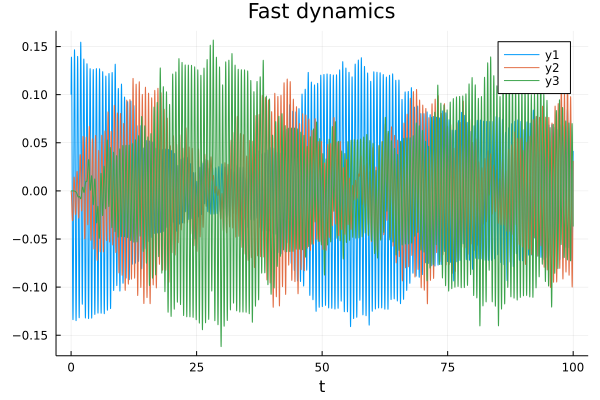

In [12]:
plot(t[1:maxIndMicro],transpose(QF[:,1:maxIndMicro]))
xlabel!("t")
title!("Fast dynamics")

In [13]:
# compute discrete momenta
PS,PF  = DiscreteConjugateMomenta(Ld,QS,QF,h,microsteps);

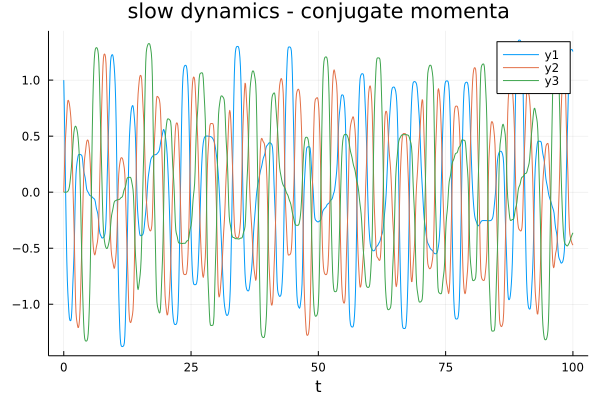

In [14]:
plot(T,transpose(PS))
xlabel!("t")
title!("slow dynamics - conjugate momenta")

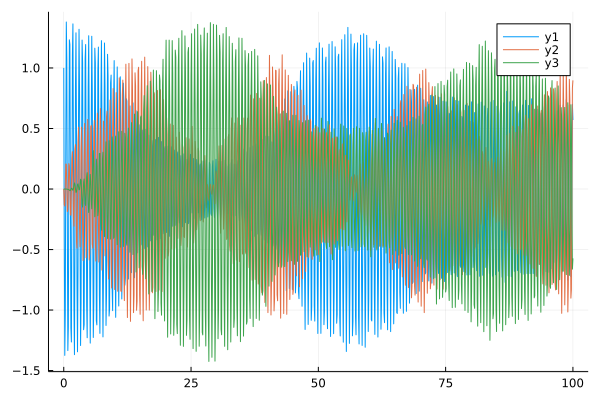

In [15]:
xlabel!("t")
title!("fast dynamics - conjugate momenta")
plot(T,transpose(PF))

In [16]:
QFMacro=QF[:,1:microsteps:end]; # QF on macro grid

In [17]:
HVals=[Hamiltonian(QS[:,j],QFMacro[:,j],PS[:,j],PF[:,j]) for j=1:N+1];

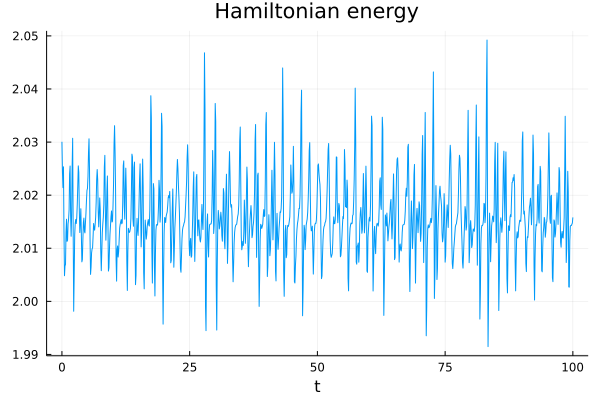

In [18]:
plot(T,HVals,legend=false)
xlabel!("t")
title!("Hamiltonian energy")

In [19]:
# oscillatory energy. This is an adiabatic constant
I=OscillatoryEnergy(QFMacro,PF);

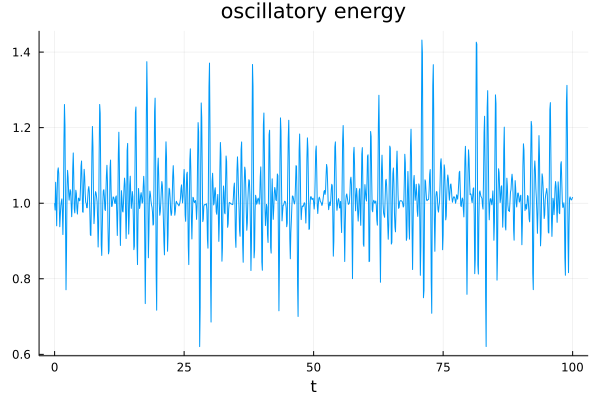

In [20]:
plot(T,transpose(I),legend=false)
xlabel!("t")
title!("oscillatory energy")